# Data Visualisation

## Objectives

Providing the client the required visual aid to understand the differences in images for the different labels: Normal, CNV, DME, DRUNSEN, which represent different conditions. This will satisfy bussiness requirement 1.

## Inputs

The notebook requires images divided in the following folders:

1. inputs/OCTdata/train
2. inputs/OCTdata/val
3. inputs/OCTdata/test

## Outputs

1. Image shape embeddings pickle file.
2. Mean and variability of images per label plot.
3. Plot to distinguish the contrast between parasite-contained and uninfected cell images.
4. Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

---

## Set Directory

### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

Finding the curent working directory

In [2]:
working_dir = os.getcwd()
working_dir

'/workspace/OCTreader/jupiter_notebooks'

Moving it to the workspace directory

In [3]:
os.chdir('/workspace/OCTreader')
working_dir = os.getcwd()
working_dir

'/workspace/OCTreader'

Now we define paths for the train, val, test folders

In [8]:
split_dirs = os.listdir('inputs/OCTdata')
split_paths = {
    split_dirs[0]: 'inputs/OCTdata/' + split_dirs[0],
    split_dirs[1]: 'inputs/OCTdata/' + split_dirs[1],
    split_dirs[2]: 'inputs/OCTdata/' + split_dirs[2]
}
labels = os.listdir(split_paths[split_dirs[0]])

[498.9088423750534, 680.5400768902178]


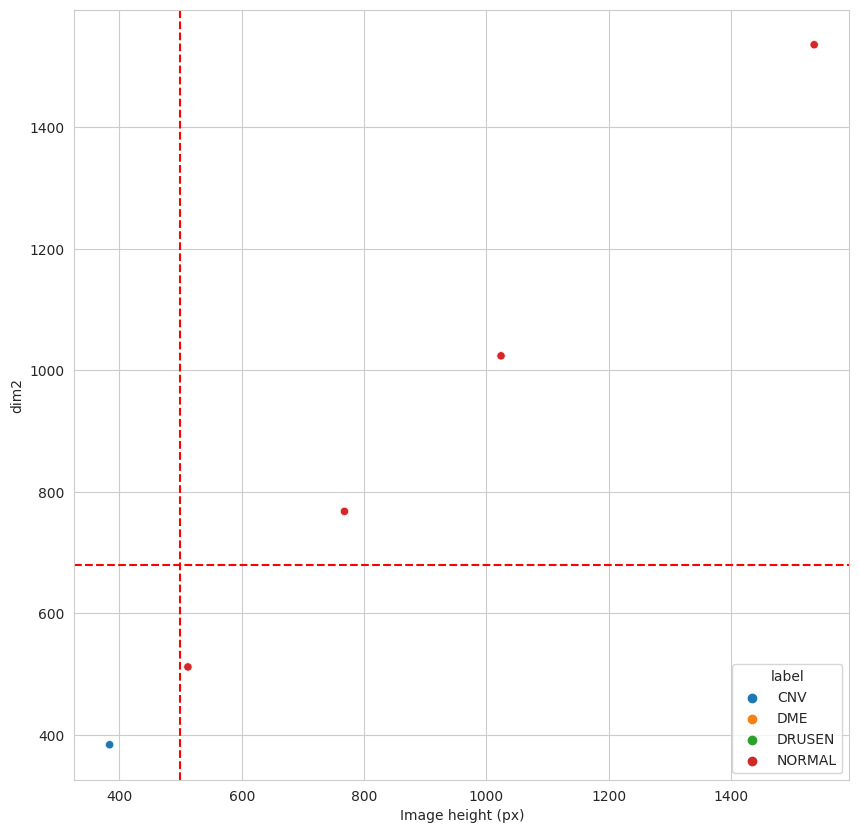

In [13]:
def average_image_shape():
    '''
    Function stores the image shape in df
    calculates mean shape size
    '''
    df = pd.DataFrame(columns=['dim1', 'dim2', 'label'])
    for label in labels:
        label_path = split_paths['train'] + '/' + label
        for image_name in os.listdir(label_path):
            img = imread(label_path + '/' + image_name)
            dim1, dim2 = img.shape
            new_row = {'dim1': dim1, 'dim2': dim2, 'label': label}
            df = df.append(new_row, ignore_index=True)
    means = (df[['dim1', 'dim2']].mean().values.tolist())
    print(means)
    
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=df, x='dim2', y='dim2', hue='label')
    axes.set_xlabel('Image width (px)')
    axes.set_xlabel('Image height (px)')
    axes.axvline(x=int(means[0]), color='r', linestyle='--')
    axes.axhline(y=int(means[1]), color='r', linestyle='--')
    plt.show()
    return [int(means[0]), int(means[1])]


img_avg_size = average_image_shape()

In [12]:
df_means

NameError: name 'df_means' is not defined